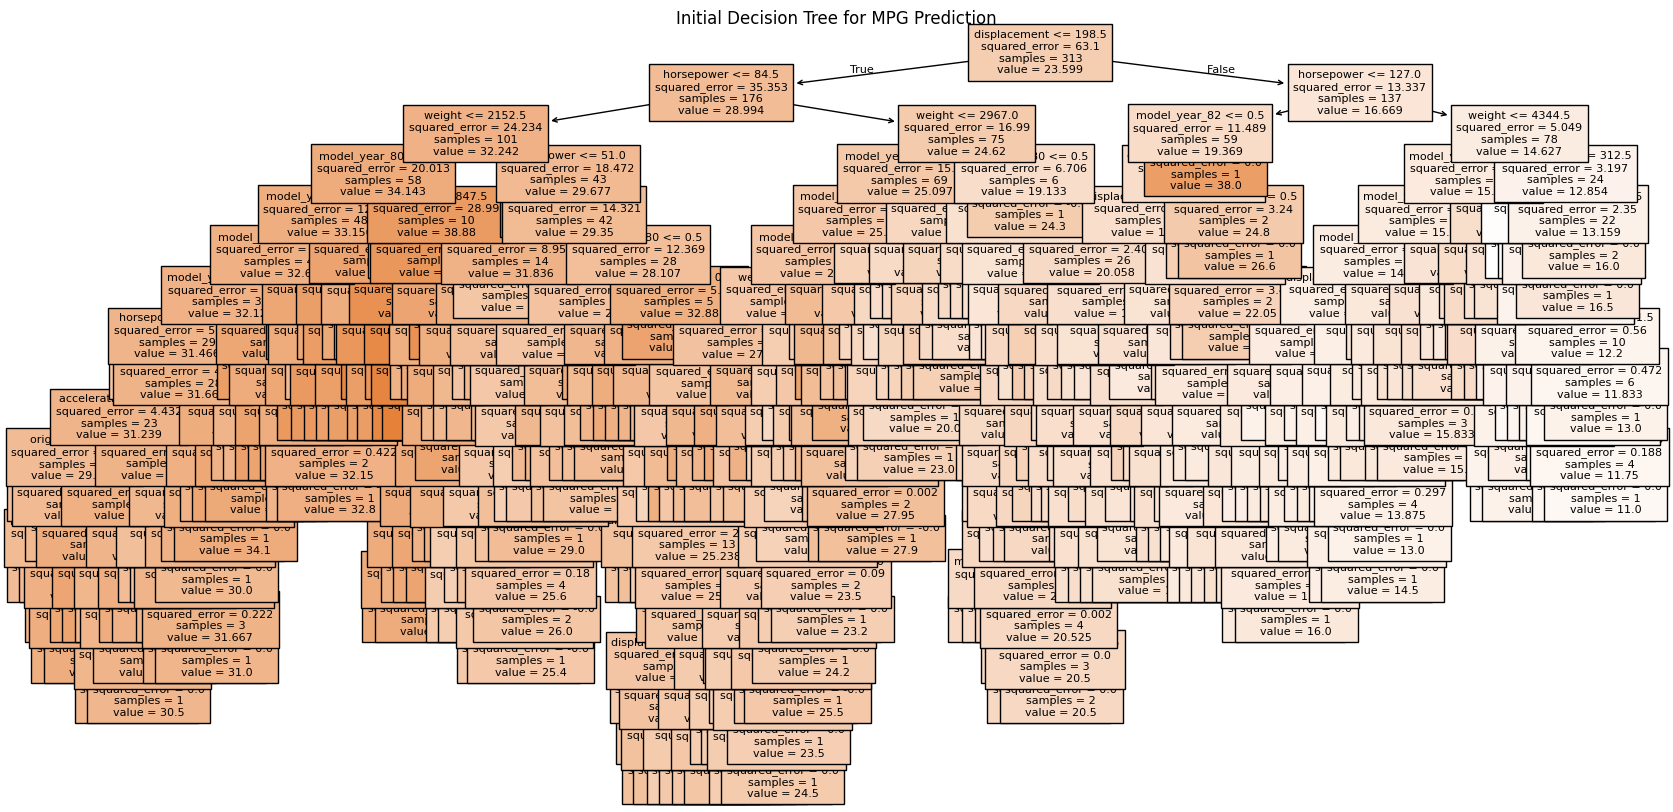

Initial decision tree plot saved as 'initial_auto_mpg_decision_tree.png'

Initial Model Evaluation Metrics:
Training MSE: 0.00
Test MSE: 14.74
Training RMSE: 0.00
Test RMSE: 3.84
Training MAE: 0.00
Test MAE: 2.79
Training R²: 1.00
Test R²: 0.71


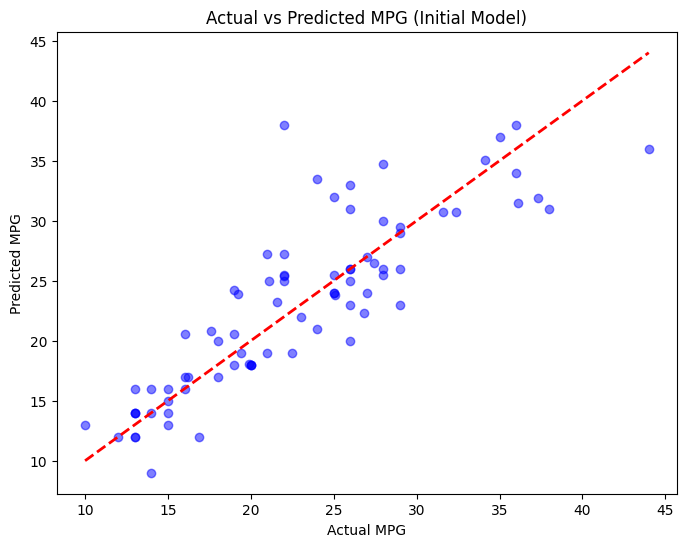


Initial Model 5-Fold Cross-Validation Results:
R² Scores: [0.711297   0.62250487 0.72004458 0.76271051 0.51326041]
Average CV R²: 0.67 (±0.18)
MSE Scores: [14.735569620253166, 21.334050632911392, 20.788974358974357, 15.193076923076925, 27.07153846153846]
Average CV MSE: 19.82 (±9.08)

Best Parameters from GridSearchCV: {'regressor__max_depth': 10, 'regressor__min_samples_leaf': 2, 'regressor__min_samples_split': 10}

Optimized Model Evaluation Metrics:
Training MSE: 5.27
Test MSE: 10.44
Training RMSE: 2.30
Test RMSE: 3.23
Training MAE: 1.54
Test MAE: 2.48
Training R²: 0.92
Test R²: 0.80


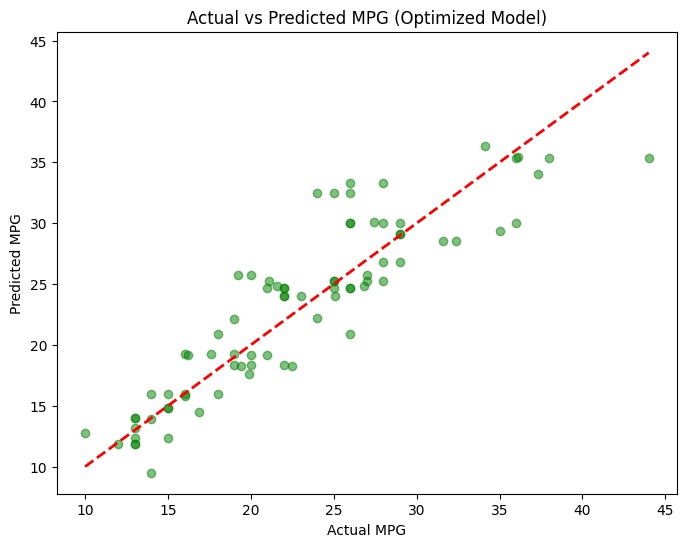


Optimized Model 5-Fold Cross-Validation Results:
R² Scores: [0.79541993 0.75473539 0.6782822  0.73082313 0.70490788]
Average CV R²: 0.73 (±0.08)
MSE Scores: [10.44188617391987, 13.861072919078554, 23.89017211455105, 17.23474952528451, 16.41246743922046]
Average CV MSE: 16.37 (±8.89)


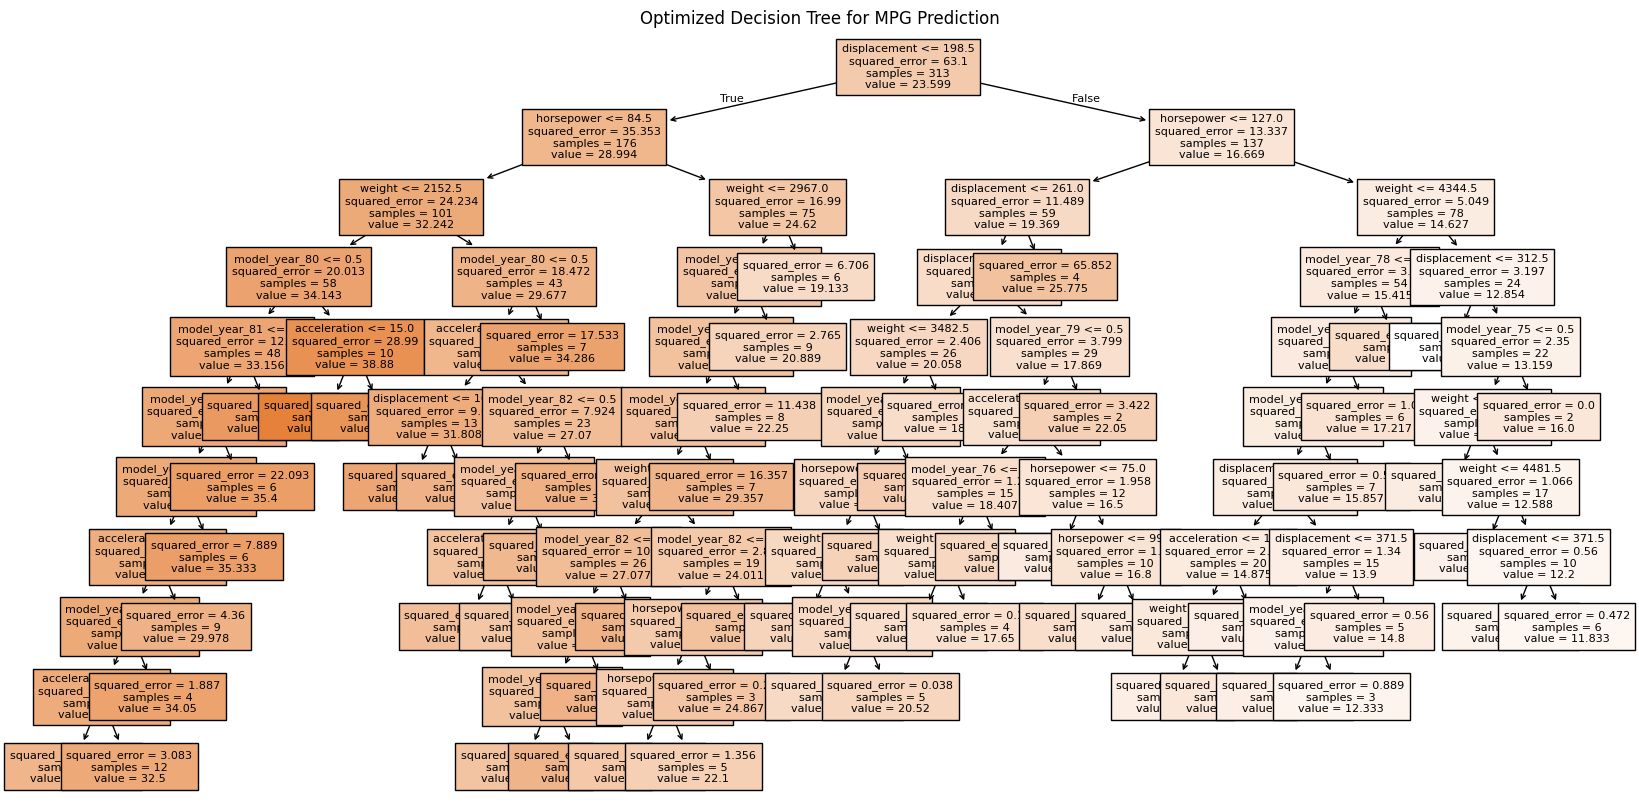

Optimized decision tree plot saved as 'optimized_auto_mpg_decision_tree.png'


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, KFold, GridSearchCV
from sklearn.tree import DecisionTreeRegressor, plot_tree, export_graphviz
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
import graphviz
import warnings
warnings.filterwarnings('ignore')

# Set random seed for reproducibility
np.random.seed(42)

# Step 1: Load the dataset
df = pd.read_csv("/Users/shriyog/Documents/SEM6/DMPM/LAB ESE/dataset/auto.csv")

# Step 2: Preprocess the dataset
# Define features and target
target = 'mpg'
X = df.drop(columns=[target])
y = df[target]

# Define numerical and categorical features
numerical_features = ['displacement', 'horsepower', 'weight', 'acceleration']
categorical_features = ['cylinders', 'model_year', 'origin']

# Preprocessing for numerical data: impute missing values
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('passthrough', 'passthrough')  # No scaling needed for decision trees
])

# Preprocessing for categorical data: one-hot encode
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(drop='first', sparse_output=False))
])

# Combine preprocessing steps
preprocessor = ColumnTransformer(transformers=[
    ('num', numerical_transformer, numerical_features),
    ('cat', categorical_transformer, categorical_features)
])

# Step 3: Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Create a pipeline with preprocessing and decision tree
dt_model = DecisionTreeRegressor(random_state=42)
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', dt_model)
])

# Step 5: Train the initial decision tree model
pipeline.fit(X_train, y_train)

# Step 6: Plot the initial decision tree
# Using sklearn's plot_tree
fitted_tree = pipeline.named_steps['regressor']
feature_names = (numerical_features +
                 pipeline.named_steps['preprocessor']
                 .named_transformers_['cat']
                 .named_steps['onehot']
                 .get_feature_names_out(categorical_features).tolist())
plt.figure(figsize=(20, 10))
plot_tree(fitted_tree, feature_names=feature_names, filled=True, fontsize=8)
plt.title("Initial Decision Tree for MPG Prediction")
plt.show()

# Using graphviz for better visualization
dot_data = export_graphviz(fitted_tree,
                          feature_names=feature_names,
                          filled=True,
                          rounded=True,
                          special_characters=True)
graph = graphviz.Source(dot_data)
graph.render("initial_auto_mpg_decision_tree", format="png", cleanup=True)
print("Initial decision tree plot saved as 'initial_auto_mpg_decision_tree.png'")

# Step 7: Predictions and evaluation for the initial model
y_pred_train = pipeline.predict(X_train)
y_pred_test = pipeline.predict(X_test)

print("\nInitial Model Evaluation Metrics:")
print(f"Training MSE: {mean_squared_error(y_train, y_pred_train):.2f}")
print(f"Test MSE: {mean_squared_error(y_test, y_pred_test):.2f}")
print(f"Training RMSE: {np.sqrt(mean_squared_error(y_train, y_pred_train)):.2f}")
print(f"Test RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_test)):.2f}")
print(f"Training MAE: {mean_absolute_error(y_train, y_pred_train):.2f}")
print(f"Test MAE: {mean_absolute_error(y_test, y_pred_test):.2f}")
print(f"Training R²: {r2_score(y_train, y_pred_train):.2f}")
print(f"Test R²: {r2_score(y_test, y_pred_test):.2f}")

# Step 8: Visualize actual vs predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_test, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual MPG')
plt.ylabel('Predicted MPG')
plt.title('Actual vs Predicted MPG (Initial Model)')
plt.show()

# Step 9: Cross-validation using V-Fold (5-Fold)
kf = KFold(n_splits=5, shuffle=True, random_state=42)
cv_scores_r2 = cross_val_score(pipeline, X, y, cv=kf, scoring='r2')
cv_scores_mse = cross_val_score(pipeline, X, y, cv=kf, scoring='neg_mean_squared_error')

print("\nInitial Model 5-Fold Cross-Validation Results:")
print(f"R² Scores: {cv_scores_r2}")
print(f"Average CV R²: {np.mean(cv_scores_r2):.2f} (±{np.std(cv_scores_r2)*2:.2f})")
print(f"MSE Scores: {[-x for x in cv_scores_mse]}")
print(f"Average CV MSE: {-np.mean(cv_scores_mse):.2f} (±{np.std(cv_scores_mse)*2:.2f})")

# Step 10: Hyperparameter tuning with GridSearchCV
param_grid = {
    'regressor__max_depth': [3, 5, 7, 10],
    'regressor__min_samples_split': [2, 5, 10],
    'regressor__min_samples_leaf': [1, 2, 4]
}
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='r2', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best model
best_model = grid_search.best_estimator_
print("\nBest Parameters from GridSearchCV:", grid_search.best_params_)

# Step 11: Evaluate the optimized model
y_pred_train_opt = best_model.predict(X_train)
y_pred_test_opt = best_model.predict(X_test)

print("\nOptimized Model Evaluation Metrics:")
print(f"Training MSE: {mean_squared_error(y_train, y_pred_train_opt):.2f}")
print(f"Test MSE: {mean_squared_error(y_test, y_pred_test_opt):.2f}")
print(f"Training RMSE: {np.sqrt(mean_squared_error(y_train, y_pred_train_opt)):.2f}")
print(f"Test RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_test_opt)):.2f}")
print(f"Training MAE: {mean_absolute_error(y_train, y_pred_train_opt):.2f}")
print(f"Test MAE: {mean_absolute_error(y_test, y_pred_test_opt):.2f}")
print(f"Training R²: {r2_score(y_train, y_pred_train_opt):.2f}")
print(f"Test R²: {r2_score(y_test, y_pred_test_opt):.2f}")

# Step 12: Visualize actual vs predicted values for the optimized model
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_test_opt, color='green', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual MPG')
plt.ylabel('Predicted MPG')
plt.title('Actual vs Predicted MPG (Optimized Model)')
plt.show()

# Step 13: Cross-validation for the optimized model
cv_scores_r2_opt = cross_val_score(best_model, X, y, cv=kf, scoring='r2')
cv_scores_mse_opt = cross_val_score(best_model, X, y, cv=kf, scoring='neg_mean_squared_error')

print("\nOptimized Model 5-Fold Cross-Validation Results:")
print(f"R² Scores: {cv_scores_r2_opt}")
print(f"Average CV R²: {np.mean(cv_scores_r2_opt):.2f} (±{np.std(cv_scores_r2_opt)*2:.2f})")
print(f"MSE Scores: {[-x for x in cv_scores_mse_opt]}")
print(f"Average CV MSE: {-np.mean(cv_scores_mse_opt):.2f} (±{np.std(cv_scores_mse_opt)*2:.2f})")

# Step 14: Plot the optimized decision tree
fitted_tree_opt = best_model.named_steps['regressor']
plt.figure(figsize=(20, 10))
plot_tree(fitted_tree_opt, feature_names=feature_names, filled=True, fontsize=8)
plt.title("Optimized Decision Tree for MPG Prediction")
plt.show()

# Using graphviz for the optimized tree
dot_data_opt = export_graphviz(fitted_tree_opt,
                              feature_names=feature_names,
                              filled=True,
                              rounded=True,
                              special_characters=True)
graph_opt = graphviz.Source(dot_data_opt)
graph_opt.render("optimized_auto_mpg_decision_tree", format="png", cleanup=True)
print("Optimized decision tree plot saved as 'optimized_auto_mpg_decision_tree.png'")


Best Parameters from GridSearchCV: {'regressor__max_depth': 10, 'regressor__min_samples_leaf': 2, 'regressor__min_samples_split': 10}

Optimized Model Evaluation Metrics:
Training MSE: 5.27
Test MSE: 10.44
Training RMSE: 2.30
Test RMSE: 3.23
Training MAE: 1.54
Test MAE: 2.48
Training R²: 0.92
Test R²: 0.80


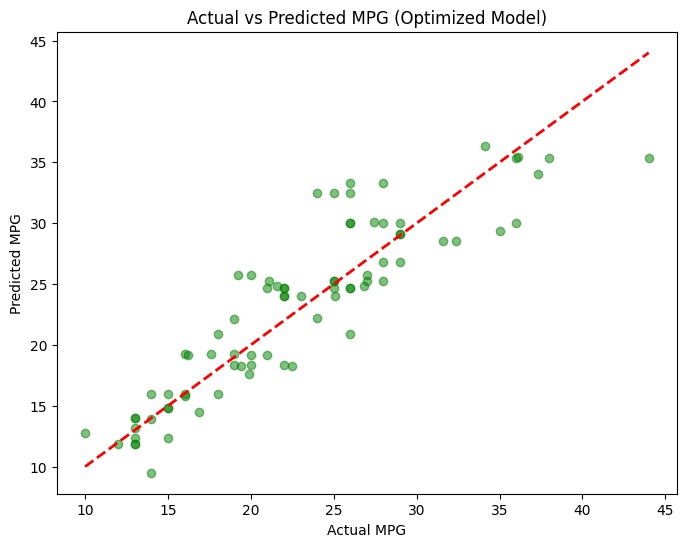


Optimized Model 5-Fold Cross-Validation Results:
R² Scores: [0.79541993 0.75473539 0.6782822  0.73082313 0.70490788]
Average CV R²: 0.73 (±0.08)
MSE Scores: [10.44188617391987, 13.861072919078554, 23.89017211455105, 17.23474952528451, 16.41246743922046]
Average CV MSE: 16.37 (±8.89)


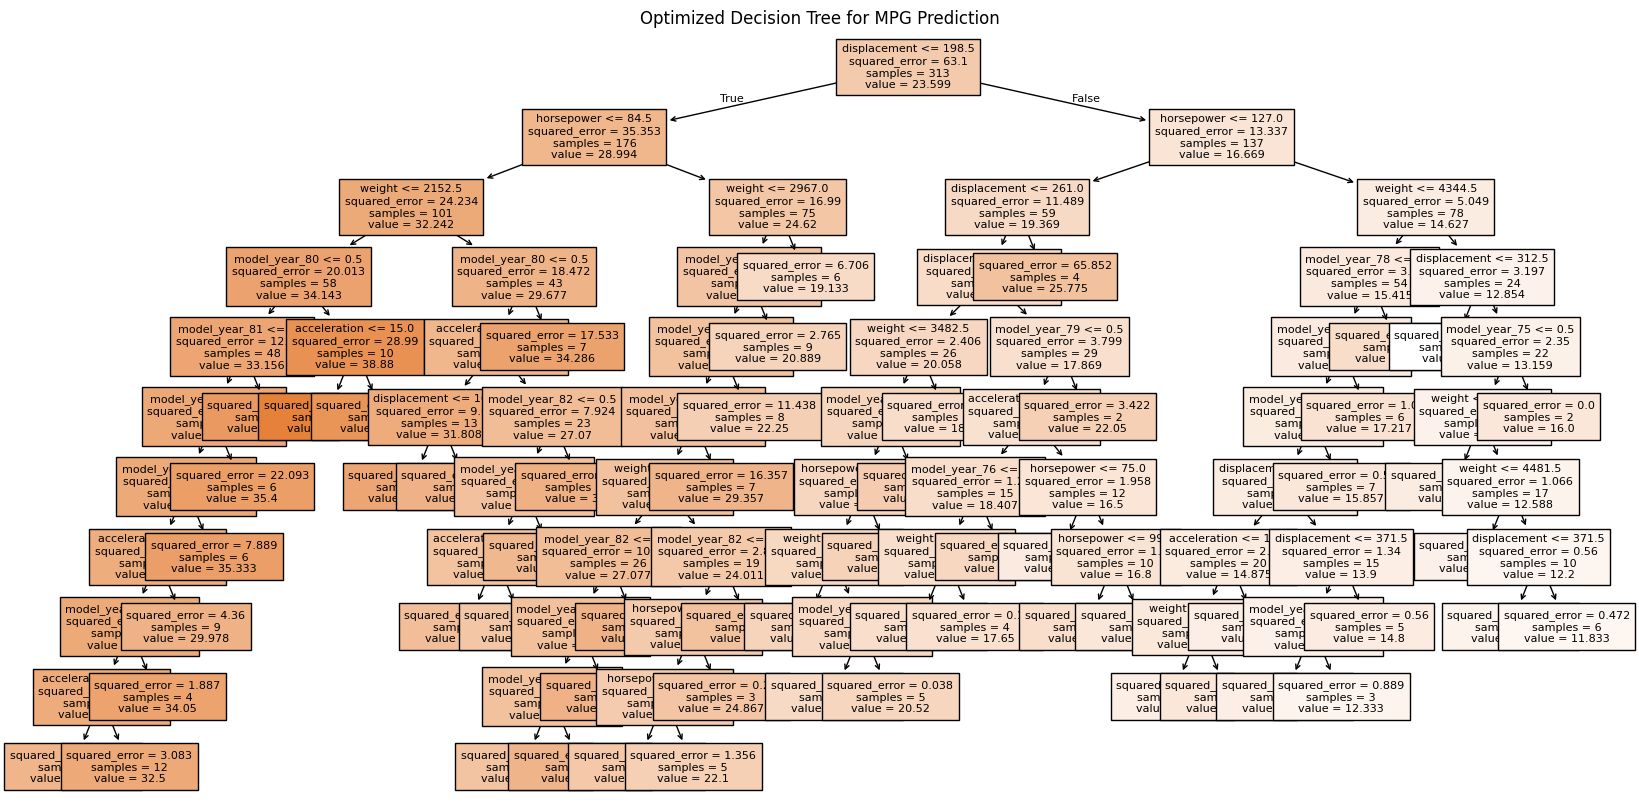

Optimized decision tree plot saved as 'optimized_auto_mpg_decision_tree.png'


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, KFold, GridSearchCV
from sklearn.tree import DecisionTreeRegressor, plot_tree, export_graphviz
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
import graphviz
import warnings
warnings.filterwarnings('ignore')

# Set random seed for reproducibility
np.random.seed(42)

# Step 1: Load the dataset
df = pd.read_csv("/Users/shriyog/Documents/SEM6/DMPM/LAB ESE/dataset/auto.csv")

# Step 2: Preprocess the dataset
# Define features and target
target = 'mpg'
X = df.drop(columns=[target])
y = df[target]

# Define numerical and categorical features
numerical_features = ['displacement', 'horsepower', 'weight', 'acceleration']
categorical_features = ['cylinders', 'model_year', 'origin']

# Preprocessing for numerical data: impute missing values
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('passthrough', 'passthrough')  # No scaling needed for decision trees
])

# Preprocessing for categorical data: one-hot encode
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(drop='first', sparse_output=False))
])

# Combine preprocessing steps
preprocessor = ColumnTransformer(transformers=[
    ('num', numerical_transformer, numerical_features),
    ('cat', categorical_transformer, categorical_features)
])

# Step 3: Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Create a pipeline with preprocessing and decision tree
dt_model = DecisionTreeRegressor(random_state=42)
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', dt_model)
])

# Step 5: Hyperparameter tuning with GridSearchCV
param_grid = {
    'regressor__max_depth': [3, 5, 7, 10],
    'regressor__min_samples_split': [2, 5, 10],
    'regressor__min_samples_leaf': [1, 2, 4]
}
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='r2', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best model
best_model = grid_search.best_estimator_
print("\nBest Parameters from GridSearchCV:", grid_search.best_params_)

# Step 6: Evaluate the optimized model
y_pred_train_opt = best_model.predict(X_train)
y_pred_test_opt = best_model.predict(X_test)

print("\nOptimized Model Evaluation Metrics:")
print(f"Training MSE: {mean_squared_error(y_train, y_pred_train_opt):.2f}")
print(f"Test MSE: {mean_squared_error(y_test, y_pred_test_opt):.2f}")
print(f"Training RMSE: {np.sqrt(mean_squared_error(y_train, y_pred_train_opt)):.2f}")
print(f"Test RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_test_opt)):.2f}")
print(f"Training MAE: {mean_absolute_error(y_train, y_pred_train_opt):.2f}")
print(f"Test MAE: {mean_absolute_error(y_test, y_pred_test_opt):.2f}")
print(f"Training R²: {r2_score(y_train, y_pred_train_opt):.2f}")
print(f"Test R²: {r2_score(y_test, y_pred_test_opt):.2f}")

# Step 7: Visualize actual vs predicted values for the optimized model
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_test_opt, color='green', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual MPG')
plt.ylabel('Predicted MPG')
plt.title('Actual vs Predicted MPG (Optimized Model)')
plt.show()

# Step 8: Cross-validation for the optimized model
kf = KFold(n_splits=5, shuffle=True, random_state=42)
cv_scores_r2_opt = cross_val_score(best_model, X, y, cv=kf, scoring='r2')
cv_scores_mse_opt = cross_val_score(best_model, X, y, cv=kf, scoring='neg_mean_squared_error')

print("\nOptimized Model 5-Fold Cross-Validation Results:")
print(f"R² Scores: {cv_scores_r2_opt}")
print(f"Average CV R²: {np.mean(cv_scores_r2_opt):.2f} (±{np.std(cv_scores_r2_opt)*2:.2f})")
print(f"MSE Scores: {[-x for x in cv_scores_mse_opt]}")
print(f"Average CV MSE: {-np.mean(cv_scores_mse_opt):.2f} (±{np.std(cv_scores_mse_opt)*2:.2f})")

# Step 9: Plot the optimized decision tree
fitted_tree_opt = best_model.named_steps['regressor']
feature_names = (numerical_features +
                 best_model.named_steps['preprocessor']
                 .named_transformers_['cat']
                 .named_steps['onehot']
                 .get_feature_names_out(categorical_features).tolist())
plt.figure(figsize=(20, 10))
plot_tree(fitted_tree_opt, feature_names=feature_names, filled=True, fontsize=8)
plt.title("Optimized Decision Tree for MPG Prediction")
plt.show()

# Using graphviz for the optimized tree
dot_data_opt = export_graphviz(fitted_tree_opt,
                              feature_names=feature_names,
                              filled=True,
                              rounded=True,
                              special_characters=True)
graph_opt = graphviz.Source(dot_data_opt)
graph_opt.render("optimized_auto_mpg_decision_tree", format="png", cleanup=True)
print("Optimized decision tree plot saved as 'optimized_auto_mpg_decision_tree.png'")